In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error

In [5]:
#1. Download the data file above and read it into a pandas DataFrame.
df = pd.read_csv("C:/Users/Vanshika/Downloads/homes.csv")


In [7]:
#2. Add the code necessary to describe the dataset
df.head()
display(df.head())

print(df.shape)


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


(51, 9)


## 3. Using markdown commentary describe the dataset:

We look at head, shape, data types, a numeric summary, and missing values.  
Columns:
a. Sell: selling price
b. List: list price
c. Living: living area (e.g., square footage)
d. Rooms: total number of rooms
e. Beds: number of bedrooms
f. Baths: number of bathrooms
g. Age: age of the property (in years)
h. Acres: lot size (in acres)
i. Taxes: annual property taxes

In [9]:
#4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis
# EDA 1 
# Why this EDA: Find data quality issues early like NAs, weird ranges and outliers.  
# What this EDA does: Count NAs and print min/max for each numeric column.

num_df = df.select_dtypes(include='number')

print("Missing values per column:")
print(df.isna().sum())

print("\nRanges (min/max) for numeric columns:")
for col in num_df.columns:
    print(f"{col:>8s}  min={num_df[col].min():.3f}  max={num_df[col].max():.3f}")



Missing values per column:
Sell      0
List      1
Living    1
Rooms     1
Beds      1
Baths     1
Age       1
Acres     1
Taxes     1
dtype: int64

Ranges (min/max) for numeric columns:
    List  min=90.000  max=625.000
  Living  min=10.000  max=64.000
   Rooms  min=5.000  max=12.000
    Beds  min=3.000  max=6.000
   Baths  min=1.000  max=4.000
     Age  min=2.000  max=202.000
   Acres  min=0.220  max=6.490
   Taxes  min=1445.000  max=12192.000


In [13]:
#Before we proceed to EDA 2; I notcied that Sell was still an abject, so I converted it into float first. 
#checked sell data type
df['Sell'].head(), df['Sell'].dtype


df['Sell'] = pd.to_numeric(
    df['Sell'].astype(str).str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
)
df['Sell'].dtype  
#shows float now


dtype('float64')

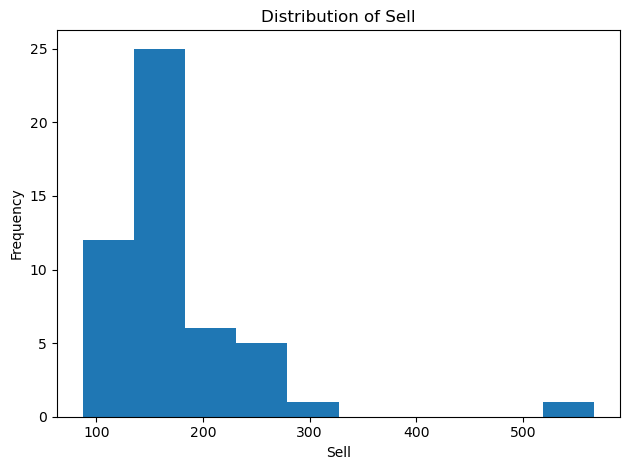

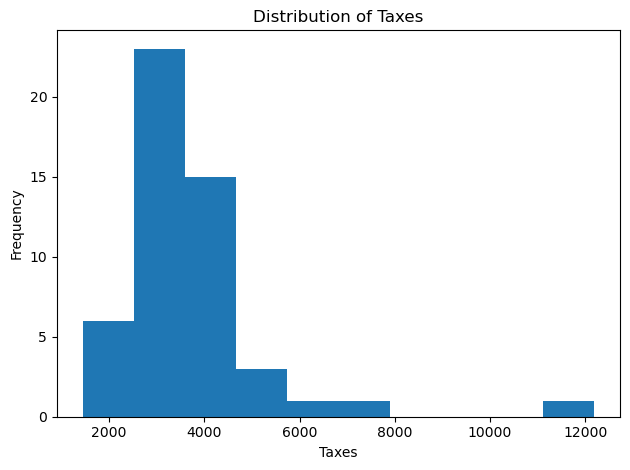

In [15]:
# EDA 2 
# Why this EDA: To check skewness and outliers and get an idea about the typical values.  
# What this EDA : Histograms of Sell and Taxes


<Figure size 640x480 with 0 Axes>

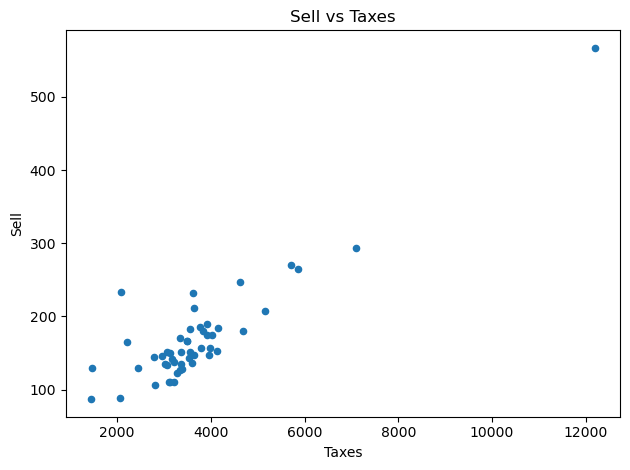

,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
List,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


In [17]:
# EDA 3 
# Why this eDA:  See whether a linear relationship seems plausible.  
# What this eda does: Scatter `Sell` vs `Taxes`, then a correlation matrix. 
# Scatter: Sell vs Taxes
plt.figure()
df.plot(kind='scatter', x='Taxes', y='Sell', title='Sell vs Taxes')
plt.tight_layout()
plt.show()

# Correlation matrix
corr = num_df.corr()
corr


In [28]:
# 5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model Linear Model 1 — `Sell ~ Taxes`
# Model 1: Sell ~ Taxes
y = df['Sell']
X1 = sm.add_constant(df[['Taxes']].astype(float))
model1 = sm.OLS(y, X1, missing='drop').fit()
print(model1.summary())

# RMSE
pred1 = model1.fittedvalues
rmse1 = mean_squared_error(y.loc[pred1.index], pred1, squared=False)
print("\nModel 1 RMSE:", rmse1)

# Extract key stats to reference in markdown
m1_r2   = model1.rsquared
m1_coef = model1.params['Taxes']
m1_p    = model1.pvalues['Taxes']
m1_int  = model1.params['const']
print(f"R2={m1_r2:.3f}, coef(Taxes)={m1_coef:.4f}, p(Taxes)={m1_p:.2e}, intercept={m1_int:.3f}")




                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        16:57:34   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

C:\Users\Vanshika\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6. In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?

R²: 0.809

Adjusted R²: 0.805

Coefficient (Taxes): positive → as property taxes increase, selling price tends to increase.

p-value (Taxes): very small (p < 0.001) → Taxes is a statistically significant predictor of selling price.

The adjusted R² value of 0.805 indicates that approximately 80.5% of the variation in home selling prices can be explained by property taxes. The coefficient for taxes is positive and highly significant (p < 0.001), which saya that homes with higher property taxes tend to sell for higher prices. Therefore, we can say that taxes is a strong predictor of selling price, although there could be some additional variables that may further improve the model’s explanatory power.

In [32]:
# 7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 
# Using List as the other independant variable
X2 = sm.add_constant(df[['List']].astype(float))
model2 = sm.OLS(y, X2, missing='drop').fit()
print(model2.summary())

pred2 = model2.fittedvalues
rmse2 = mean_squared_error(y.loc[pred2.index], pred2, squared=False)
print("\nModel 2 RMSE:", rmse2)

m2_r2   = model2.rsquared
m2_coef = model2.params['List']
m2_p    = model2.pvalues['List']
m2_int  = model2.params['const']
print(f"R2={m2_r2:.3f}, coef(List)={m2_coef:.4f}, p(List)={m2_p:.2e}, intercept={m2_int:.3f}")


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9312.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           1.26e-56
Time:                        16:58:58   Log-Likelihood:                -152.97
No. Observations:                  50   AIC:                             309.9
Df Residuals:                      48   BIC:                             313.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3274      1.846      3.969      0.0

C:\Users\Vanshika\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Which model is "better"? What are some limitations of the model? 

Model 2 — Sell ~ List

R²: 0.995

Adjusted R²: 0.995

Coefficient (List): 0.914 → for every  1 usd increase in list price, the selling price increases by about 0.91 usd on average.

p-value (List): 0.000 → List price is a highly significant predictor of selling price.

RMSE: ≈ 5.16 → very small average prediction error compared with the scale of the prices.

Interpretation:
this model fits very well, explaining 99.5 % of the variation in selling prices using only the list price. The R² is near perfect and the highly significant coefficient indicate a very strong linear relationship between list price and selling price, as expected, since homes are usually sold at amounts close to their listing price.

Conclusion:
Compared with Model 1 (Sell ~ Taxes, Adjusted R² = 0.805), this model is much better: it has a comparatively higher R² and a lower RMSE. Therefore, List price is a far better predictor of selling price than Taxes.

Limitations:

The model uses only one variable (list price); real prices can also depend on other factors such as location, size, or age.

The sample size (n = 50) is also decent so results could be sensitive to outliers, and because both variables are highly correlated, this model may show overfitting if applied to new data.